In [1]:
import math
import collections
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

### Load the GHCN-daily dataset from the N.O.A.A website

In [2]:
#NOAA stands for the "National Oceanic and Atmospheric Administration" a US govt agency.
#NOAA has its own integrated database called "GHCN" where it stores daily climate
#summaries from land surfaces across the globe.

#GHCN-contains records from over 100000 stations in 180 countries and territories.

#N.C.E.I provides numerous daily variables, including maximum and minimum temperature,
#total daily precipitation, snowfall, and snow depth.

#Both the record length and period of record vary by stations and cover intervals

#ranging from less than a year to more than 175 years.

### Loading the dataset with python

In [3]:
#download the 'readme.txt' file from the NOAA website
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt',
                           'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x281540d19d0>)

In [5]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                           'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x281540d1970>)

IV. FORMAT OF "ghcnd-stations.txt"
----------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------

In [6]:
# loading a fixed-width text file: we prescribe the widths of every field;
# the names of the resulting array columns; their datatypes. 'Uxx' stands
# for unicode string of length xx; 'd' for double precision floating point

stations = np.genfromtxt('stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

In [7]:
stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

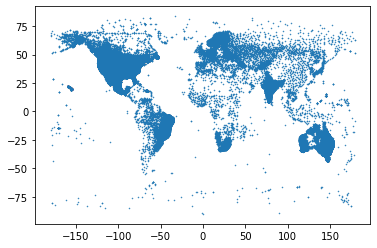

In [8]:
#Plot the LONGITUDE and LATITUDE to have an idea of the global coverage of the database
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

In [9]:
#Stations in california
stations_ca = stations[stations['state'] == 'CA']

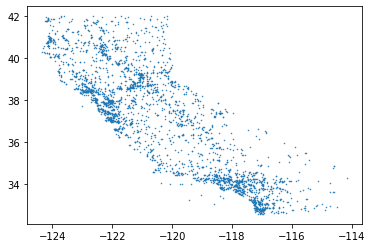

In [10]:
pp.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize=1)

In [11]:
#locate the 'PASADENA' station in california state.
stations[stations['name'] == 'PASADENA']

array([('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [12]:
#Query to find all stations with name 'PASADENA'
stations[np.char.find(stations['name'], 'PASADENA') == 0]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.6746,  -95.2104,   9.1, 'TX', 'PASADENA 3.6 WNW', '', '', ''),
       ('USC00046719', 34.1

In [13]:
#Download station data for 'PASADENA' from the NOAA website
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly', 'PASADENA.dly')

('PASADENA.dly', <http.client.HTTPMessage at 0x2815a121910>)

In [14]:
import getweather

In [15]:
help(getweather.getyear)

Help on function getyear in module getweather:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.
    
    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



In [16]:
getweather.getyear('PASADENA', ['TMIN','TMAX'], 2000)

array([( 6.1, 14.4), ( 6.1, 18.3), ( 3.9, 18.3), ( 6.1, 20. ),
       ( 6.1, 20.6), ( 5.6, 20. ), ( 5.6, 18.3), ( 3.3, 21.7),
       ( 5. , 20.6), ( 6.1, 18.3), ( 6.7, 18.9), ( 8.3, 17.8),
       ( 7.8, 24.4), (11.1, 26.1), (12.8, 26.1), (13.3, 23.9),
       (13.3, 20.6), (13.9, 24.4), (11.1, 25.6), (12.8, 21.7),
       (11.7, 18.3), (10. , 18.3), ( 7.8, 20. ), (11.7, 22.8),
       (12.2, 21.7), ( 8.3, 20.6), ( 7.2, 20.6), ( 6.1, 21.7),
       ( 6.7, 21.7), (10. , 17.8), (11.1, 16.7), (13.3, 24.4),
       (11.1, 26.7), ( 9.4, 26.7), ( 8.9, 23.9), (10.6, 21.1),
       ( 6.7, 25. ), ( nan,  nan), (15.6, 26.7), (10. , 23.9),
       (10.6, 19.4), ( 5. , 18.3), ( 9.4, 17.8), ( 9.4, 15.6),
       (10.6, 16.7), ( 8.9, 19.4), (10. , 16.7), ( 7.2, 17.2),
       ( 6.1, 22.2), ( 7.8, 25. ), ( 9.4, 23.9), ( 6.7, 13.3),
       ( 7.2, 13.9), ( 7.8, 12.8), ( 2.8, 16.1), ( 8.3, 15. ),
       ( 5.6, 21.7), ( 8.3, 20.6), ( 4.4, 17.2), ( 7.2, 18.3),
       ( 6.7, 19.4), ( 7.2, 22.2), (17.2, 20. ), ( 7.2,

### Filling missing values (NaN) in the dataset

In [17]:
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

In [18]:
pasadena['TMIN']

array([ 9.4,  8.3,  8.9,  8.3, 10. , 10.6,  7.2,  7.2,  7.8,  6.1,  5.6,
        6.1,  5. ,  3.9,  4.4,  2.8,  5. ,  3.9,  5.6,  7.2,  7.2,  8.9,
        5.6,  6.7,  3.3,  5.6,  3.3,  3.3,  3.3,  3.9,  5. ,  5. ,  6.1,
        nan,  7.2, 13.9, 11.1,  5.6,  2.2,  3.9,  6.1,  3.3,  5.6,  6.1,
        2.8,  2.8,  4.4,  7.8, 10. ,  9.4,  5.6,  5.6,  7.8,  5. ,  3.9,
        6.7,  7.2,  7.8,  6.7,  5. ,  5.6,  8.3,  9.4, 10. ,  9.4, 10. ,
        8.9, 10.6,  6.1,  8.9,  8.3,  7.2,  7.8, 10. , 10. ,  7.8, 10.6,
       13.3, 14.4, 10.6, 11.7, 11.1,  9.4, 10. , 12.2, 10. , 11.1, 12.8,
       12.8, 12.8, 12.2, 11.1, 10.6,  8.3,  8.3,  6.1,  7.2,  3.3, 16.1,
        3.9,  8.9,  7.8,  6.7,  7.2,  7.2,  9.4,  9.4, 12.2, 11.1,  8.9,
        6.1,  7.2, 10. , 10. , 16.1, 12.2, 12.8, 11.7,  nan, 11.1, 11.7,
       12.2, 11.1, 10.6, 11.1, 12.2, 13.3, 15.6, 16.1, 14.4, 13.3, 13.9,
       13.3, 10.6, 13.3, 13.9, 14.4, 15. ,  nan, 11.1, 14.4, 15. , 15.6,
       15. , 15.6, 16.7, 14.4, 14.4, 12.8, 13.9, 15

In [19]:
#analyse the amount of NaNs in the dataset
np.isnan(pasadena['TMIN'])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [21]:
#Total number of NaNs in the minimum temperature dataset
np.isnan(pasadena['TMIN']).sum()

15

In [22]:
#Try fill up NaN with average or mean temperature (min and max)
pasadena['TMIN'][np.isnan(pasadena['TMIN'])] = np.nanmean(pasadena['TMIN'])

In [23]:
pasadena['TMIN']

array([ 9.4       ,  8.3       ,  8.9       ,  8.3       , 10.        ,
       10.6       ,  7.2       ,  7.2       ,  7.8       ,  6.1       ,
        5.6       ,  6.1       ,  5.        ,  3.9       ,  4.4       ,
        2.8       ,  5.        ,  3.9       ,  5.6       ,  7.2       ,
        7.2       ,  8.9       ,  5.6       ,  6.7       ,  3.3       ,
        5.6       ,  3.3       ,  3.3       ,  3.3       ,  3.9       ,
        5.        ,  5.        ,  6.1       , 11.45314286,  7.2       ,
       13.9       , 11.1       ,  5.6       ,  2.2       ,  3.9       ,
        6.1       ,  3.3       ,  5.6       ,  6.1       ,  2.8       ,
        2.8       ,  4.4       ,  7.8       , 10.        ,  9.4       ,
        5.6       ,  5.6       ,  7.8       ,  5.        ,  3.9       ,
        6.7       ,  7.2       ,  7.8       ,  6.7       ,  5.        ,
        5.6       ,  8.3       ,  9.4       , 10.        ,  9.4       ,
       10.        ,  8.9       , 10.6       ,  6.1       ,  8.9 

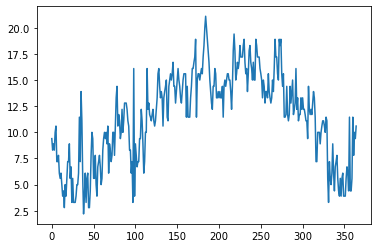

In [24]:
pp.plot(pasadena['TMIN'])

In [25]:
#Better alternative to use 'Linear Interpolation' technique to fill up missing values
#create a general function for filling up missing data using Linear interpolation in an array or data sets.

def fill_missing(array):
    good_data = ~np.isnan(array)
    x = np.arange(len(array))
    return np.interp(x, x[good_data], array[good_data])

In [29]:
#fill up missing data in Pasadena 'MIN' and 'MAX'
pasadena_min = fill_missing(pasadena['TMIN'])
pasadena_max = fill_missing(pasadena['TMAX'])

In [30]:
pasadena_max

array([25.6  , 26.7  , 25.6  , 26.1  , 23.9  , 23.3  , 23.3  , 19.4  ,
       17.8  , 14.4  , 11.1  , 12.2  , 17.2  , 17.2  , 15.   , 14.4  ,
       16.1  , 17.2  , 17.2  , 23.3  , 23.3  , 19.4  , 17.2  , 15.   ,
       13.9  , 13.3  , 16.1  , 16.7  , 14.4  , 17.8  , 18.9  , 21.1  ,
       23.9  , 28.9  , 32.2  , 28.9  , 25.6  , 15.   , 15.   , 13.9  ,
       14.4  , 15.6  , 10.6  , 10.6  , 14.4  , 16.7  , 20.   , 20.   ,
       19.4  , 17.2  , 17.2  , 20.6  , 18.3  , 14.4  , 12.8  , 12.2  ,
       16.7  , 13.3  , 10.6  , 18.9  , 17.8  , 18.3  , 16.1  , 18.3  ,
       19.4  , 20.   , 20.6  , 18.9  , 17.2  , 16.1  , 22.2  , 23.9  ,
       21.7  , 21.7  , 20.6  , 25.6  , 30.6  , 31.7  , 31.1  , 29.4  ,
       20.6  , 21.1  , 23.3  , 23.3  , 23.3  , 26.1  , 23.9  , 23.9  ,
       29.4  , 25.6  , 23.9  , 20.   , 18.9  , 14.4  , 18.3  , 17.8  ,
       16.1  , 18.3  , 16.7  , 18.9  , 18.9  , 17.8  , 24.4  , 24.4  ,
       25.   , 26.7  , 28.9  , 26.7  , 21.1  , 20.   , 20.6  , 24.4  ,
      

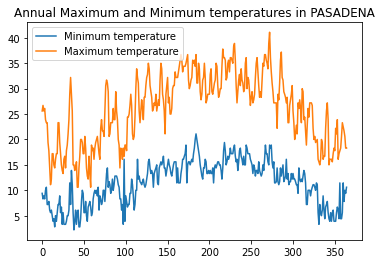

In [32]:
pp.plot(pasadena_min, label='Minimum temperature')
pp.plot(pasadena_max, label='Maximum temperature')
pp.title('Annual Maximum and Minimum temperatures in PASADENA')
pp.legend()

## Visualize and analyze weather data in the town of 'HILO'

In [33]:
#load data for 'Hilo'
hilo = getweather.getyear('HILO', ['TMIN','TMAX'], 2000)

In [35]:
#clean dnd fill up missing values
fill_missing(hilo['TMIN'])
fill_missing(hilo['TMAX'])

array([26.7, 26.1, 26.7, 26.1, 24.4, 23.9, 23.3, 22.2, 23.3, 25.6, 23.9,
       23.3, 22.2, 25. , 24.4, 22.8, 23.3, 21.7, 23.9, 23.3, 23.9, 23.9,
       23.9, 23.9, 24.4, 23.9, 23.9, 23.9, 23.3, 25.6, 25.6, 25.6, 25.6,
       25.6, 26.1, 26.1, 26.7, 26.7, 27.2, 26.7, 26.7, 26.7, 27.2, 26.7,
       26.7, 27.8, 28.3, 27.8, 27.2, 25.6, 26.1, 26.7, 26.7, 27.2, 27.2,
       27.8, 27.2, 27.2, 27.2, 27.8, 26.7, 26.7, 27.2, 27.2, 26.7, 26.1,
       25. , 26.7, 27.8, 27.8, 27.8, 27.2, 27.2, 27.8, 27.8, 28.9, 27.2,
       25.6, 26.7, 27.2, 26.1, 26.1, 25.6, 24.4, 26.1, 25.6, 24.4, 24.4,
       25.6, 26.1, 26.7, 26.1, 25.6, 25. , 24.4, 22.8, 25. , 25.6, 25.6,
       21.7, 21.7, 22.8, 25. , 26.1, 26.7, 25.6, 25.6, 23.3, 25.6, 26.1,
       25. , 25.6, 27.2, 27.2, 25. , 26.1, 26.1, 25. , 26.7, 25.6, 26.7,
       26.7, 26.1, 27.8, 27.8, 27.2, 27.8, 28.3, 27.8, 27.2, 28.3, 26.1,
       27.2, 26.7, 26.7, 27.8, 27.2, 27.8, 26.7, 27.8, 27.2, 27.8, 26.7,
       27.8, 27.2, 27.8, 26.7, 27.2, 27.2, 27.8, 27

### Create a function to smoothen the time series

In [36]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

(19.102739726027398, 14.4, 23.3)

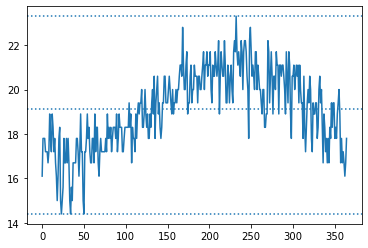

In [37]:
pp.plot(hilo['TMIN'])

# plot horizontal lines at mean, min, and max of TMIN data
for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    pp.axhline(value, linestyle=':')

### Analyze precipitation data for 'HILO' 

In [38]:
#Load dataset from NOAA website

In [39]:
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP']

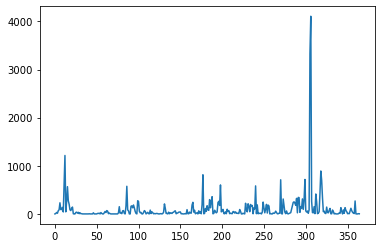

In [40]:
pp.plot(rain)

In [41]:
# Create a general function to smooth any array--to reduce noise

def smooth_array(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

Text(0, 0.5, 'Temp-Celsius')

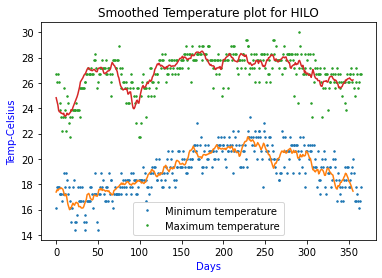

In [45]:
pp.plot(hilo['TMIN'], '.', label='Minimum temperature', ms=3)
pp.plot(smooth_array(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'], '.',label='Maximum temperature', ms=3)
pp.plot(smooth_array(hilo['TMAX'], 10))
pp.title('Smoothed Temperature plot for HILO')
pp.legend()
pp.xlabel('Days', color= 'blue')
pp.ylabel('Temp-Celsius', color='blue')

In [50]:
# load TMIN and TMAX data for a station and year; fill NaNs;
# plot unsmoothed data as dots, smoothed data as lines,
# dropping boundary values and adjusting x axis consistently

def smooth_dataset(station, year):
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)

    for obs in ['TMIN','TMAX']:   
        stationdata[obs] = fill_missing(stationdata[obs])
    
        # thinner points
        pp.plot(stationdata[obs], '.', ms=1)
        pp.plot(range(10,356), smooth_array(stationdata[obs], 20))
    
    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

No handles with labels found to put in legend.


Text(0, 0.5, 'Temp-Celsius')

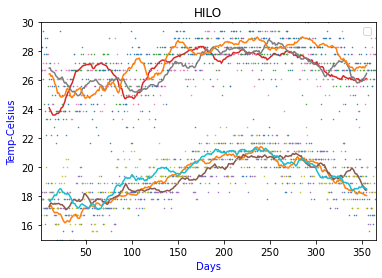

In [55]:
smooth_dataset('HILO', 2000)
smooth_dataset('HILO', 2001)
smooth_dataset('HILO', 2002)

pp.axis(ymin=15,ymax=30)
pp.legend()
pp.xlabel('Days', color= 'blue')
pp.ylabel('Temp-Celsius', color='blue')

## Comparison of the weather in different cities in the U.S

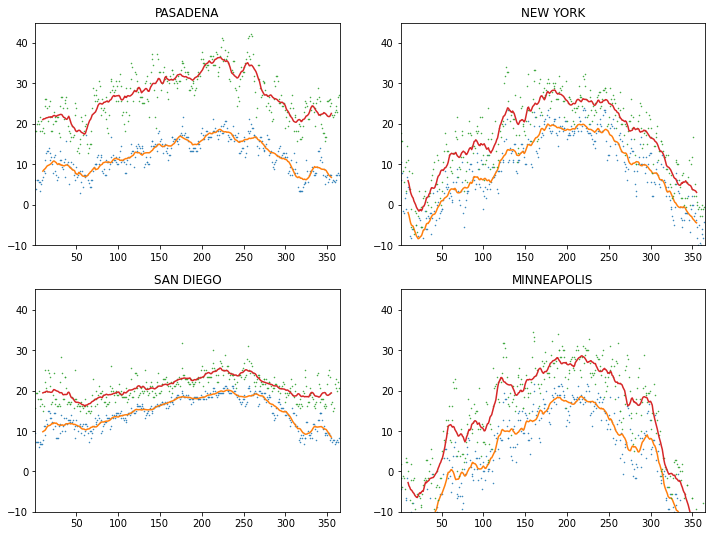

In [56]:
#plots for four (4) cities in the U.S for year 2000
pp.figure(figsize=(12,9))

for i, city in enumerate(['PASADENA','NEW YORK','SAN DIEGO','MINNEAPOLIS']):
    pp.subplot(2,2,i+1)
    smooth_dataset(city, 2000)

In [ ]:
# from the above plots, one can make a choice of the best city to live
# in terms of the weather